# Project 1 - Fare Prediction for a Cab Rental Start-up

In [1]:
# import required libraries

import os # I/O operations
import pandas as pd # Panda Data manipulation and analysis
import numpy as np # Data analysis library
import matplotlib.pyplot as plt # Data visualization library
import seaborn as sns # Data visualization library
from collections import Counter # For Counting


In [2]:
#Set working directory
#os.chdir("E:\Edwisor\Project1")

In [3]:
# read train data in pandas dataframe
df_train =  pd.read_csv('./train_cab.csv')

In [4]:
# read test data in pandas dataframe
df_test =  pd.read_csv('./test.csv')

## Data Understanding & Analysis

In [5]:
# list first few rows (datapoints)
df_train.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1.0
1,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1.0
2,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2.0
3,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1.0
4,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1.0


In [6]:
# check no. of rows and variables
df_train.shape

(16067, 7)

In [7]:
# check data types
df_train.dtypes

fare_amount           object
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count      float64
dtype: object

In [8]:
# list first few rows  of test data
df_test.head()

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2015-01-27 13:08:24 UTC,-73.973320,40.763805,-73.981430,40.743835,1
1,2015-01-27 13:08:24 UTC,-73.986862,40.719383,-73.998886,40.739201,1
2,2011-10-08 11:53:44 UTC,-73.982524,40.751260,-73.979654,40.746139,1
3,2012-12-01 21:12:12 UTC,-73.981160,40.767807,-73.990448,40.751635,1
4,2012-12-01 21:12:12 UTC,-73.966046,40.789775,-73.988565,40.744427,1


In [9]:
# check data types of test data
df_test.dtypes

pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

# Data Cleaning, Missing Value & Outliers analysis

### Convert to proper Data Types

In [10]:
# Since fare_amount is object which means, it might be having non-numeric data
# we need to convert it to numeric using errors=’coerce’ which will replace all non-numeric values with NaN.

df_train["fare_amount"] = pd.to_numeric(df_train["fare_amount"], errors = "coerce")  

# check data types
df_train.dtypes

fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count      float64
dtype: object

In [11]:
# Similarly, convert pickup_datetime variable from object to datetime

# using errors=’coerce’ which will add NaN values.
df_train['pickup_datetime'] =  pd.to_datetime(df_train['pickup_datetime'], format='%Y-%m-%d %H:%M:%S UTC', errors = "coerce")

# check data types
df_train.dtypes

fare_amount                 float64
pickup_datetime      datetime64[ns]
pickup_longitude            float64
pickup_latitude             float64
dropoff_longitude           float64
dropoff_latitude            float64
passenger_count             float64
dtype: object

### Missing Value Analysis

In [12]:
#Create dataframe with missing percentage
missing_train = pd.DataFrame(df_train.isnull().sum())

missing_train # print data

,0
fare_amount,25
pickup_datetime,1
pickup_longitude,0
pickup_latitude,0
dropoff_longitude,0
dropoff_latitude,0
passenger_count,55


In [13]:
# Here we can see that there are 25 missing values in fare_amount & 55 in passenger_count
# Let's check the percentage of missing values

# reset index
missing_train = missing_train.reset_index()

# Change variable names
missing_train = missing_train.rename(columns = {'index': 'Variables', 0: 'Missing Percentage'})

# Missing percentage
missing_train['Missing Percentage'] = (missing_train['Missing Percentage']/len(df_train))*100

# sort in decending order
missing_train = missing_train.sort_values('Missing Percentage', ascending = False).reset_index(drop = True)

missing_train # print data

,Variables,Missing Percentage
0,passenger_count,0.342317
1,fare_amount,0.155598
2,pickup_datetime,0.006224
3,pickup_longitude,0.000000
4,pickup_latitude,0.000000
5,dropoff_longitude,0.000000
6,dropoff_latitude,0.000000


In [14]:
# Missing Percentage => passenger_count: 0.342317 & fare_amount = 0.149374 & pickup_datetime = 0.006224
# Since missing values are very less and it can be dropped

# Dropping missing values
df_train = df_train.drop(df_train[df_train['fare_amount'].isnull()].index, axis = 0)
df_train = df_train.drop(df_train[df_train['passenger_count'].isnull()].index, axis = 0)
df_train = df_train.drop(df_train[df_train['pickup_datetime'].isnull()].index, axis = 0)


In [15]:
# Let's verify missing values again
df_train.isnull().sum()

# There's no missing values now.

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [16]:
# Let's separate datetime variable into year, month, date, day, hour, minute 
# so that we can deal with it in a regression problem.

df_train['year'] = df_train['pickup_datetime'].dt.year
df_train['month'] = df_train['pickup_datetime'].dt.month
df_train['date'] = df_train['pickup_datetime'].dt.day
df_train['day'] = df_train['pickup_datetime'].dt.dayofweek
df_train['hour'] = df_train['pickup_datetime'].dt.hour
df_train['minute'] = df_train['pickup_datetime'].dt.minute

df_train.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,date,day,hour,minute
0,4.5,2009-06-15 17:26:21,-73.844311,40.721319,-73.841610,40.712278,1.0,2009,6,15,0,17,26
1,16.9,2010-01-05 16:52:16,-74.016048,40.711303,-73.979268,40.782004,1.0,2010,1,5,1,16,52
2,5.7,2011-08-18 00:35:00,-73.982738,40.761270,-73.991242,40.750562,2.0,2011,8,18,3,0,35
3,7.7,2012-04-21 04:30:42,-73.987130,40.733143,-73.991567,40.758092,1.0,2012,4,21,5,4,30
4,5.3,2010-03-09 07:51:00,-73.968095,40.768008,-73.956655,40.783762,1.0,2010,3,9,1,7,51


### Outlier Analysis

In [17]:
# Here's few things to observe to find out outliers:
# 1. Passenger count can not be more than 6
# 2. Latitudes range from -90 to 90. Longitudes range from -180 to 180

#### Removing Outliers: passenger_count

In [18]:
# Checking the passenger count variable

df_train['passenger_count'].describe()

count    15986.000000
mean         2.623272
std         60.892140
min          0.000000
25%          1.000000
50%          1.000000
75%          2.000000
max       5345.000000
Name: passenger_count, dtype: float64

In [19]:
# sort in ascending order 
df_train['passenger_count'].sort_values(ascending = False)

1146     5345.0
293      5334.0
8985      557.0
971       554.0
8506      537.0
1200      536.0
356       535.0
8715      531.2
263       456.0
386       354.0
1107      345.0
233       236.0
8571       87.0
8445       58.0
8406       53.0
1007       53.0
1242       43.0
8631       43.0
1043       35.0
2719        6.0
15799       6.0
13041       6.0
15291       6.0
10987       6.0
14089       6.0
5675        6.0
3585        6.0
2770        6.0
2744        6.0
14083       6.0
          ...  
4354        0.0
6575        0.0
13227       0.0
8661        0.0
4114        0.0
5150        0.0
5161        0.0
8916        0.0
6881        0.0
3489        0.0
11462       0.0
314         0.0
15514       0.0
2200        0.0
9159        0.0
10642       0.0
14196       0.0
13742       0.0
4344        0.0
5914        0.0
1160        0.0
3034        0.0
5688        0.0
9965        0.0
12611       0.0
5517        0.0
8971        0.0
3481        0.0
15919       0.0
10711       0.0
Name: passenger_count, L

In [20]:
# print the count of outliers
print(Counter(df_train['passenger_count'] < 1))
print(Counter(df_train['passenger_count'] > 6))

Counter({False: 15928, True: 58})
Counter({False: 15967, True: 19})


In [21]:
# Here, 58 passenger_count are 0 and 19 are more than 6

# Remove Outliers: passenger_count
df_train = df_train.drop(df_train[df_train['passenger_count'] > 6].index, axis=0)
df_train = df_train.drop(df_train[df_train['passenger_count'] < 1].index, axis=0)

# verify passenger count
print(Counter(df_train['passenger_count'] < 1))
print(Counter(df_train['passenger_count'] > 6))

Counter({False: 15909})
Counter({False: 15909})


#### Removing Outliers: pickup_longitude, pickup_latitude, dropoff_longitude & dropoff_latitude

In [22]:
# longitude values should be -180 to +180
# latitude values should be -90 to +90

# let's check our data
df_train.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,date,day,hour,minute
count,15909.000000,15909.000000,15909.000000,15909.000000,15909.000000,15909.000000,15909.000000,15909.000000,15909.000000,15909.000000,15909.000000,15909.000000
mean,15.059678,-72.475638,39.921796,-72.465901,39.899679,1.649588,2011.731158,6.263750,15.671318,3.034634,13.494626,29.655478
std,432.255920,10.536179,6.815976,10.564099,6.184895,1.265762,1.866947,3.447214,8.685775,1.968796,6.521453,17.299770
min,-3.000000,-74.438233,-74.006893,-74.429332,-74.006377,1.000000,2009.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,6.000000,-73.992148,40.734942,-73.991182,40.734700,1.000000,2010.000000,3.000000,8.000000,1.000000,9.000000,15.000000
50%,8.500000,-73.981693,40.752625,-73.980158,40.753563,1.000000,2012.000000,6.000000,16.000000,3.000000,14.000000,30.000000
75%,12.500000,-73.966802,40.767380,-73.963643,40.768016,2.000000,2013.000000,9.000000,23.000000,5.000000,19.000000,45.000000
max,54343.000000,40.766125,401.083332,40.802437,41.366138,6.000000,2015.000000,12.000000,31.000000,6.000000,23.000000,59.000000


In [23]:
# pickup_longitude => min: -74.438233 & max: 40.766125 (NO OUTLIERS)
# pickup_latitude => min: -74.006893 & max: 401.083332 (WITH OUTLIERS)

# dropoff_longitude => min: -74.429332 & max: 40.802437 (NO OUTLIERS)
# dropoff_latitude => min: -74.006377 & max: 41.366138 (NO OUTLIERS)

# From above data we can see that there're outliers in pickup_latitude that's why it's max value is 401.083332

# Checking Outliers: pickup_latitude
df_train[df_train['pickup_latitude'] < -90]
df_train[df_train['pickup_latitude'] > +90]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,date,day,hour,minute
5686,3.3,2011-07-30 11:15:00,-73.947235,401.083332,-73.951392,40.778927,1.0,2011,7,30,5,11,15


In [24]:
# Removing Outliers: pickup_latitude
df_train = df_train.drop((df_train[df_train['pickup_latitude']<-90]).index, axis=0)
df_train = df_train.drop((df_train[df_train['pickup_latitude']>90]).index, axis=0)

# verify data after removing pickup_latitude outliers
df_train.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,date,day,hour,minute
count,15908.000000,15908.000000,15908.000000,15908.000000,15908.000000,15908.000000,15908.000000,15908.000000,15908.000000,15908.000000,15908.000000,15908.000000
mean,15.060417,-72.475546,39.899093,-72.465807,39.899624,1.649629,2011.731204,6.263704,15.670417,3.034511,13.494782,29.656399
std,432.269497,10.536504,6.185460,10.564424,6.185086,1.265791,1.866996,3.447318,8.685305,1.968796,6.521628,17.299923
min,-3.000000,-74.438233,-74.006893,-74.429332,-74.006377,1.000000,2009.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,6.000000,-73.992148,40.734941,-73.991182,40.734691,1.000000,2010.000000,3.000000,8.000000,1.000000,9.000000,15.000000
50%,8.500000,-73.981695,40.752620,-73.980161,40.753562,1.000000,2012.000000,6.000000,16.000000,3.000000,14.000000,30.000000
75%,12.500000,-73.966812,40.767371,-73.963643,40.768012,2.000000,2013.000000,9.000000,23.000000,5.000000,19.000000,45.000000
max,54343.000000,40.766125,41.366138,40.802437,41.366138,6.000000,2015.000000,12.000000,31.000000,6.000000,23.000000,59.000000


#### Removing Outliers: fare_amount

In [25]:
df_train['fare_amount'].describe()

count    15908.000000
mean        15.060417
std        432.269497
min         -3.000000
25%          6.000000
50%          8.500000
75%         12.500000
max      54343.000000
Name: fare_amount, dtype: float64

Text(0.5, 0, 'Fare')

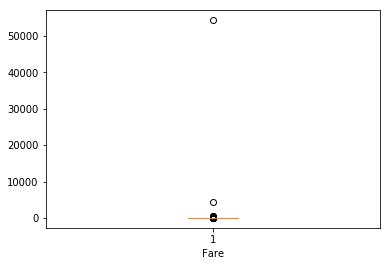

In [26]:
# usginx boxplot to find outliers

plt.boxplot(df_train['fare_amount'])
plt.xlabel('Fare')


In [27]:
# checking outliers by sorting in decending order
df_train["fare_amount"].sort_values(ascending=False)

1015     54343.00
1072      4343.00
607        453.00
980        434.00
1335       180.00
1483       165.00
6630       128.83
14142      108.00
12349      104.67
12915       96.00
7810        95.00
9431        88.00
10077       87.30
12614       87.00
4620        85.50
14519       82.50
12437       80.75
2639        79.00
4013        77.70
13962       77.15
2013        77.00
6668        76.80
8363        76.00
10524       75.80
11019       75.33
13615       75.00
15023       73.30
1494        70.00
4118        69.70
9651        66.30
           ...   
9773         2.50
15370        2.50
6007         2.50
10111        2.50
3558         2.50
15257        2.50
1671         2.50
6226         2.50
6276         2.50
6297         2.50
4367         2.50
11153        2.50
11222        2.50
9621         2.50
12567        2.50
14530        2.50
14574        2.50
6765         2.50
11062        2.50
6703         2.50
4058         2.50
14633        2.50
12598        2.50
6632         2.50
1427      

In [28]:
# looking at the results we got to know that higghest cab fares were 54343 and 4343 which can not be possible
# negative fare values are also outliers

# Removing Outliers: fare_amount
df_train = df_train.drop(df_train[df_train['fare_amount'] < 1].index, axis = 0)
df_train = df_train.drop(df_train[df_train['fare_amount'] > 453].index, axis = 0)

# verify data after removing fare_amount outliers
df_train.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,date,day,hour,minute
count,15901.000000,15901.000000,15901.000000,15901.000000,15901.000000,15901.000000,15901.000000,15901.000000,15901.000000,15901.000000,15901.000000,15901.000000
mean,11.376864,-72.474894,39.898732,-72.465150,39.899265,1.649726,2011.730709,6.264952,15.669832,3.034275,13.494309,29.655808
std,10.815059,10.538777,6.186797,10.566703,6.186423,1.265870,1.866738,3.447255,8.684920,1.968691,6.521858,17.300109
min,1.140000,-74.438233,-74.006893,-74.429332,-74.006377,1.000000,2009.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,6.000000,-73.992145,40.734948,-73.991181,40.734716,1.000000,2010.000000,3.000000,8.000000,1.000000,9.000000,15.000000
50%,8.500000,-73.981693,40.752640,-73.980158,40.753565,1.000000,2012.000000,6.000000,16.000000,3.000000,14.000000,30.000000
75%,12.500000,-73.966815,40.767382,-73.963643,40.768026,2.000000,2013.000000,9.000000,23.000000,5.000000,19.000000,45.000000
max,453.000000,40.766125,41.366138,40.802437,41.366138,6.000000,2015.000000,12.000000,31.000000,6.000000,23.000000,59.000000


In [29]:
# check current shape of dataframe
df_train.shape

(15901, 13)

In [30]:
# Let's use haversine formula to calculate distance between pickup & dropoff location

import math

def haversine(a):
    lon1 = a[0]
    lat1 = a[1]
    lon2 = a[2]
    lat2 = a[3]

    # convert decimal degrees to radians     
    lon1, lat1, lon2, lat2 = map(math.radians, [lon1, lat1, lon2, lat2])
    
    # Haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = math.sin(dlat/2)**2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon/2)**2
    c = 2 * math.asin(math.sqrt(a)) 
    km = 6371 * c
    
    return km

In [31]:
# create a new variable distance and calculate it using haversine function we created above
df_train['distance'] = df_train[['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude']].apply(haversine,axis=1)

#check our new train data
df_train.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,date,day,hour,minute,distance
0,4.5,2009-06-15 17:26:21,-73.844311,40.721319,-73.841610,40.712278,1.0,2009,6,15,0,17,26,1.030764
1,16.9,2010-01-05 16:52:16,-74.016048,40.711303,-73.979268,40.782004,1.0,2010,1,5,1,16,52,8.450134
2,5.7,2011-08-18 00:35:00,-73.982738,40.761270,-73.991242,40.750562,2.0,2011,8,18,3,0,35,1.389525
3,7.7,2012-04-21 04:30:42,-73.987130,40.733143,-73.991567,40.758092,1.0,2012,4,21,5,4,30,2.799270
4,5.3,2010-03-09 07:51:00,-73.968095,40.768008,-73.956655,40.783762,1.0,2010,3,9,1,7,51,1.999157


#### Removing Outliers: distance

Text(0.5, 0, 'Distance')

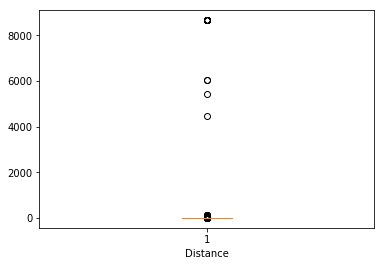

In [32]:
# let's use boxplot to find out outliners
plt.boxplot(df_train['distance'])
plt.xlabel('Distance')

In [33]:
# Let's sort distance to get the idea
df_train['distance'].sort_values(ascending = False)

9147     8667.542104
8647     8667.497512
2397     8667.454421
472      8667.304968
11653    8666.701504
13340    8666.613646
10215    8666.584706
4597     8666.566030
10458    8665.976222
10672    8665.702390
10488    8665.555634
1260     8665.268588
4278     8665.223767
6188     8664.191488
12983    8664.131808
6302     8663.039123
12705    8661.362152
14197    8657.136619
15783    8656.714168
15749    6028.926779
2280     6026.494216
5864     5420.988959
7014     4447.086698
10710     129.950482
14536     129.560455
11619     127.509261
12228     123.561157
5663      101.094619
1684       99.771579
3075       97.985088
            ...     
7684        0.000000
4298        0.000000
13143       0.000000
3128        0.000000
8645        0.000000
8377        0.000000
4240        0.000000
2447        0.000000
4367        0.000000
11565       0.000000
13081       0.000000
13062       0.000000
4454        0.000000
13013       0.000000
13015       0.000000
808         0.000000
6462        0

In [34]:
# Removing Outliers: fare_amount

df_train = df_train.drop(df_train[df_train['distance']== 0].index, axis=0)
df_train = df_train.drop(df_train[df_train['distance'] > 130].index, axis=0)


# verify data after removing distance outliers
df_train['distance'].describe()

count    15424.000000
mean         3.442771
std          4.597240
min          0.000111
25%          1.277978
50%          2.191322
75%          3.935514
max        129.950482
Name: distance, dtype: float64

In [35]:
# We almost cleaned our data, but now, let's remove variables that are not useful now.

# Remove pickup_longitude, pickup_latitude, dropoff_longitude, dropoff_latitude as we have distance
deleteCols = ['pickup_datetime', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'minute']
df_train = df_train.drop(deleteCols, axis = 1)

# check new data after removing unnecessary columns
df_train.head()

,fare_amount,passenger_count,year,month,date,day,hour,distance
0,4.5,1.0,2009,6,15,0,17,1.030764
1,16.9,1.0,2010,1,5,1,16,8.450134
2,5.7,2.0,2011,8,18,3,0,1.389525
3,7.7,1.0,2012,4,21,5,4,2.799270
4,5.3,1.0,2010,3,9,1,7,1.999157


In [36]:
# verify our datatypes
df_train.dtypes 

fare_amount        float64
passenger_count    float64
year                 int64
month                int64
date                 int64
day                  int64
hour                 int64
distance           float64
dtype: object

In [37]:
# convert passanger_count to int from float
df_train['passenger_count'] = df_train['passenger_count'].astype('int64')

# verify our datatypes
df_train.dtypes 

fare_amount        float64
passenger_count      int64
year                 int64
month                int64
date                 int64
day                  int64
hour                 int64
distance           float64
dtype: object

In [38]:
# Let's perform same set of operations on test data

df_test['pickup_datetime'] =  pd.to_datetime(df_test['pickup_datetime'], format='%Y-%m-%d %H:%M:%S UTC', errors = "coerce")

df_test['year'] = df_test['pickup_datetime'].dt.year
df_test['Month'] = df_test['pickup_datetime'].dt.month
df_test['Date'] = df_test['pickup_datetime'].dt.day
df_test['Day'] = df_test['pickup_datetime'].dt.dayofweek
df_test['Hour'] = df_test['pickup_datetime'].dt.hour
df_test['Minute'] = df_test['pickup_datetime'].dt.minute

df_test.head()


,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,Month,Date,Day,Hour,Minute
0,2015-01-27 13:08:24,-73.973320,40.763805,-73.981430,40.743835,1,2015,1,27,1,13,8
1,2015-01-27 13:08:24,-73.986862,40.719383,-73.998886,40.739201,1,2015,1,27,1,13,8
2,2011-10-08 11:53:44,-73.982524,40.751260,-73.979654,40.746139,1,2011,10,8,5,11,53
3,2012-12-01 21:12:12,-73.981160,40.767807,-73.990448,40.751635,1,2012,12,1,5,21,12
4,2012-12-01 21:12:12,-73.966046,40.789775,-73.988565,40.744427,1,2012,12,1,5,21,12


In [39]:
df_test.isnull().sum()

pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
year                 0
Month                0
Date                 0
Day                  0
Hour                 0
Minute               0
dtype: int64

In [40]:
df_test['distance'] = df_test[['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude']].apply(haversine,axis=1)

df_test.head()

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,Month,Date,Day,Hour,Minute,distance
0,2015-01-27 13:08:24,-73.973320,40.763805,-73.981430,40.743835,1,2015,1,27,1,13,8,2.323259
1,2015-01-27 13:08:24,-73.986862,40.719383,-73.998886,40.739201,1,2015,1,27,1,13,8,2.425353
2,2011-10-08 11:53:44,-73.982524,40.751260,-73.979654,40.746139,1,2011,10,8,5,11,53,0.618628
3,2012-12-01 21:12:12,-73.981160,40.767807,-73.990448,40.751635,1,2012,12,1,5,21,12,1.961033
4,2012-12-01 21:12:12,-73.966046,40.789775,-73.988565,40.744427,1,2012,12,1,5,21,12,5.387301


In [41]:
test_deleteCols = ['pickup_datetime', 'pickup_longitude', 'pickup_latitude','dropoff_longitude', 'dropoff_latitude', 'Minute']
df_test = df_test.drop(test_deleteCols, axis = 1)

df_test.head()


,passenger_count,year,Month,Date,Day,Hour,distance
0,1,2015,1,27,1,13,2.323259
1,1,2015,1,27,1,13,2.425353
2,1,2011,10,8,5,11,0.618628
3,1,2012,12,1,5,21,1.961033
4,1,2012,12,1,5,21,5.387301


## Data Visualization

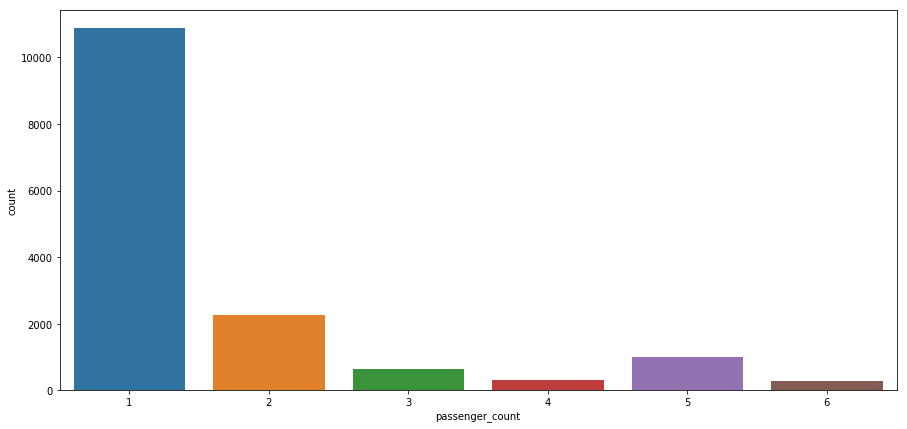

In [42]:
# Number of Passengers effects the the fare

# Count plot: passenger count
plt.figure(figsize=(15,7))
sns.countplot(x="passenger_count", data = df_train)

# Conclusion: Single passengers are the most frequent travellers

Text(0, 0.5, 'Frequency')

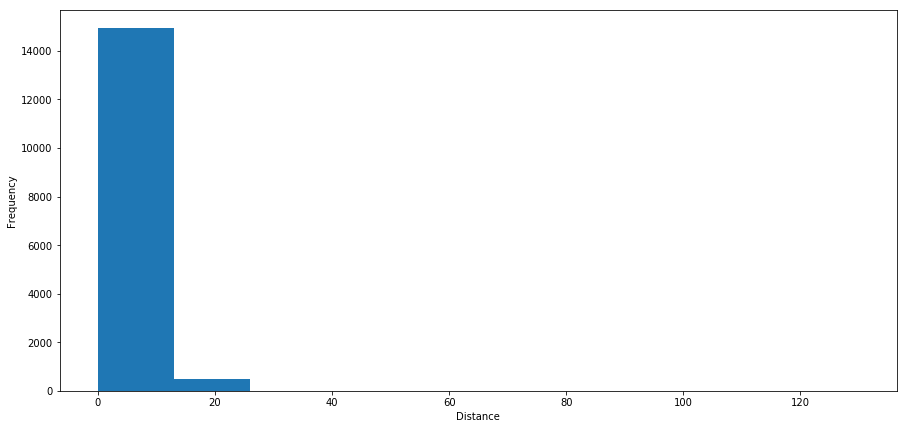

In [43]:
# plot Distance
plt.figure(figsize=(15,7))
plt.hist(df_train['distance'], bins=10)
plt.xlabel('Distance')
plt.ylabel('Frequency')

# Conclusion: Most of the passengers travel less than 10kms

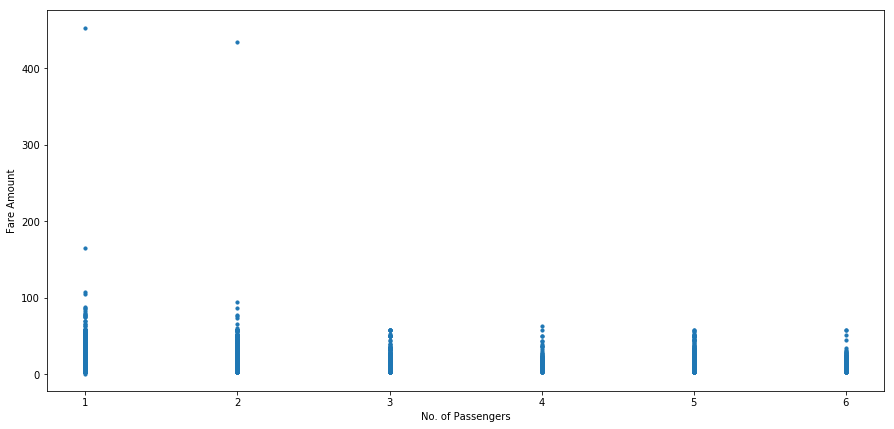

In [44]:
# Plot beetween fare_amount and number of passangers

plt.figure(figsize=(15,7))
plt.scatter(x = df_train['passenger_count'], y = df_train['fare_amount'], s=10)
plt.xlabel('No. of Passengers')
plt.ylabel('Fare Amount')
plt.show()

# Conclusion: single & double travelling passengers are paying highest fare

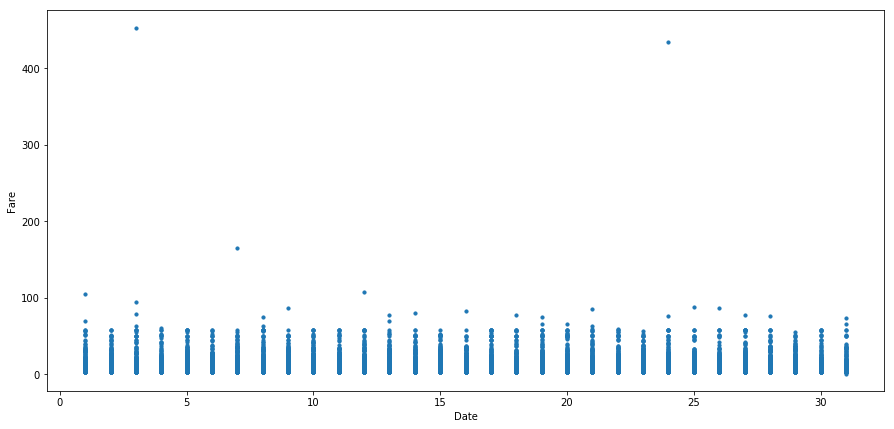

In [45]:
# Plot between date and fare_amount

plt.figure(figsize=(15,7))
plt.scatter(x = df_train['date'], y = df_train['fare_amount'], s=10)
plt.xlabel('Date')
plt.ylabel('Fare')
plt.show()

# Conclusion: single & double travelling passengers are paying highest fare

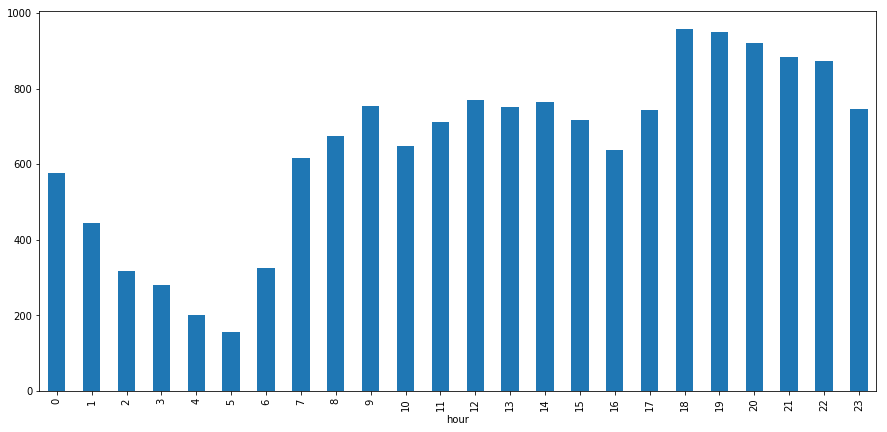

In [46]:
# Bar plot of hour
plt.figure(figsize=(15,7))
df_train.groupby(df_train["hour"])['hour'].count().plot(kind="bar")
plt.show()

# Conclusion: 5 AM has lowest cabs and highest at and around 7 PM (office rush hours)

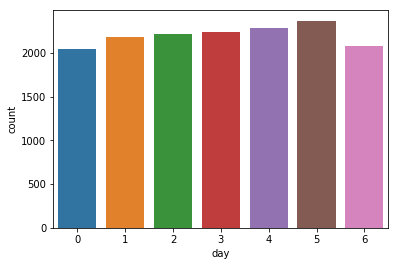

In [47]:
# Plot Days
sns.countplot(x="day", data=df_train)

# Conclusion: Days does not have much impact

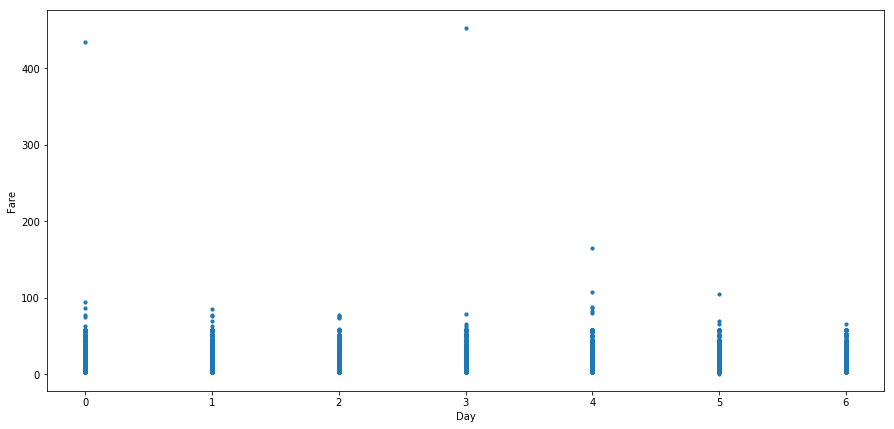

In [48]:
# Plot between day and fare_amount
plt.figure(figsize=(15,7))
plt.scatter(x = df_train['day'], y = df_train['fare_amount'], s=10)
plt.xlabel('Day')
plt.ylabel('Fare')
plt.show()

# COnslucion: highest fares is on a Sunday, Monday, Thursday and Friday

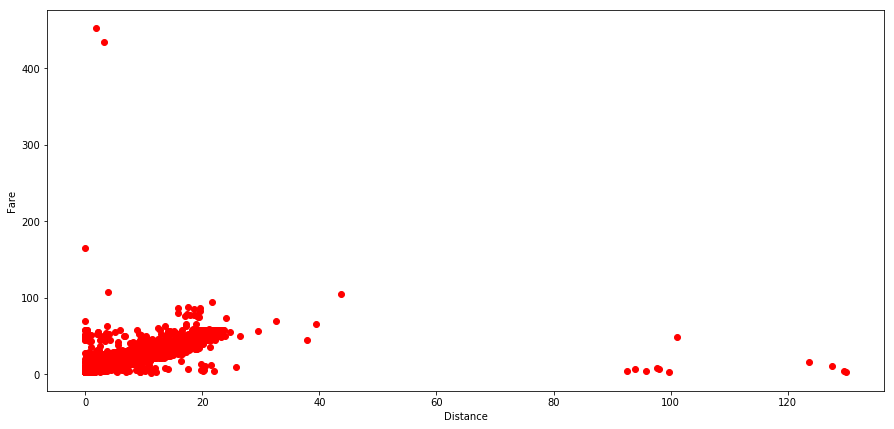

In [49]:
# Plot between distance and fare_amount 
plt.figure(figsize=(15,7))
plt.scatter(x = df_train['distance'], y = df_train['fare_amount'], color='red')
plt.xlabel('Distance')
plt.ylabel('Fare')
plt.show()

# Conclusion: longer distance has highest fare_amount

## Feature Selection

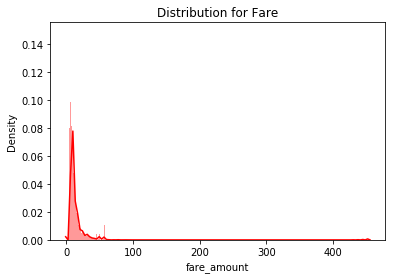

In [50]:
# Normality check of training data is uniformly distributed or not

# Plot distribution of fare_amount
sns.distplot(df_train['fare_amount'],bins='auto',color='red')
plt.title("Distribution for Fare")
plt.ylabel("Density")
plt.show()

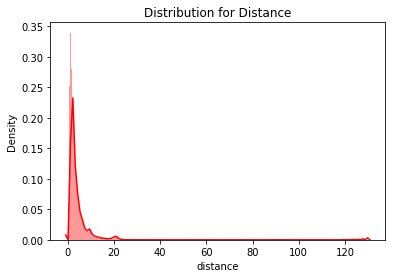

In [51]:
# Plot distribution of distance
sns.distplot(df_train['distance'],bins='auto',color='red')
plt.title("Distribution for Distance")
plt.ylabel("Density")
plt.show()

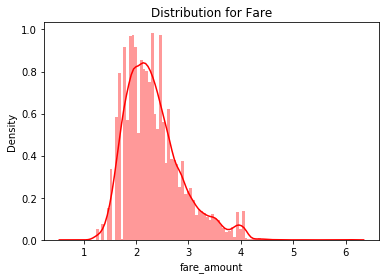

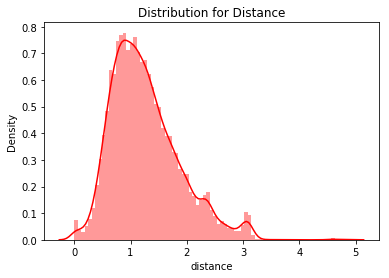

In [52]:
# apply log transform to reduce the skewness

df_train['fare_amount'] = np.log1p(df_train['fare_amount'])
df_train['distance'] = np.log1p(df_train['distance'])


# Normality Re-check to check data is uniformly distributed or not after log transformartion
sns.distplot(df_train['fare_amount'],bins='auto',color='red')
plt.title("Distribution for Fare")
plt.ylabel("Density")
plt.show()

sns.distplot(df_train['distance'],bins='auto',color='red')
plt.title("Distribution for Distance")
plt.ylabel("Density")
plt.show()

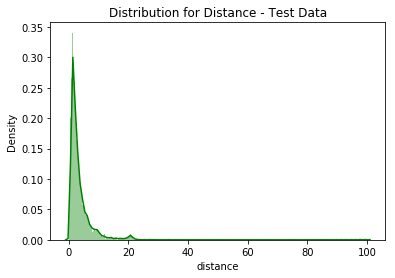

In [53]:
# Test data normality check for distance

sns.distplot(df_test['distance'],bins='auto',color='green')
plt.title("Distribution for Distance - Test Data")
plt.ylabel("Density")
plt.show()

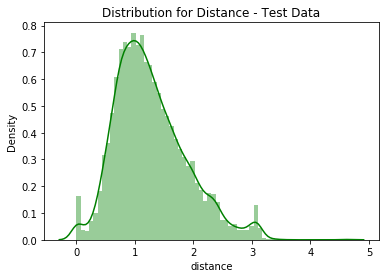

In [54]:
# apply log transform to reduce the skewness
df_test['distance'] = np.log1p(df_test['distance'])

sns.distplot(df_test['distance'],bins='auto',color='green')
plt.title("Distribution for Distance - Test Data")
plt.ylabel("Density")
plt.show()

In [ ]:
# Here we can see a bell shaped distribution, after applying log function, the data is normalised
# we will use not use any Feature Scalling technique. i.e, Normalization or Standarization for our test data

# Exploratory data analysis, missing value and outlier analysis, feature selection, feature scaling is done. 
# Data is ready 

## Model Development

In [73]:
# Now, let's import few libraries, required for model development

from sklearn.model_selection import train_test_split #used to split dataset into train and test
from sklearn.metrics import mean_squared_error # used to calculate MSE
from sklearn.metrics import r2_score # used to calculate r square
from sklearn.linear_model import LinearRegression # Machine Algorithm 
from sklearn.tree import DecisionTreeRegressor # Machine Algorithm 
from sklearn.ensemble import RandomForestRegressor # Machine Algorithm 
from sklearn.ensemble import GradientBoostingRegressor # Gradient Booster
from pprint import pprint # used in tuning 
from sklearn.model_selection import GridSearchCV # used to tune hyper parameters  
from sklearn.model_selection import RandomizedSearchCV # used to tune hyper parameters 
from math import sqrt

In [60]:
# Before going for model development, we need to split the data into train data and test data.
X_train, X_test, y_train, y_test = train_test_split( 
    df_train.iloc[:, df_train.columns != 'fare_amount'], 
    df_train.iloc[:, 0], 
    test_size = 0.20, 
    random_state = 1
)

# independent var, dependent var, test data size (here 20%, rest of the 80% data will be training data)

print(X_train.shape)
print(X_test.shape)

(12339, 7)
(3085, 7)


### Linear Regression

In [64]:
# Building LRModel on training data
LRModel = LinearRegression().fit(X_train, y_train)

# Predicting LRModel on train data
LRTrain = LRModel.predict(X_train)

# Predicting LRModel on test data
LRTest = LRModel.predict(X_test)


# Calculating RMSE for train & test data
LRTrain_RMSE = np.sqrt(mean_squared_error(y_train, LRTrain))
LRTest_RMSE = np.sqrt(mean_squared_error(y_test, LRTest))

print('RMSE Values:')
print('Training Data = ' + str(LRTrain_RMSE))
print('Test Data = ' + str(LRTest_RMSE))

RMSE Values:
Training Data = 0.2753110017967313
Test Data = 0.245406617869775


In [65]:
# Calculating Rsquare for train & test data
LRTrain_rsquare = r2_score(y_train, LRTrain)
LRTest_rsquare = r2_score(y_test, LRTest)

print('Rsquare Values:')
print('Training Data = ' + str(LRTrain_rsquare))
print('Test Data = ' + str(LRTest_rsquare))

Rsquare Values:
Training Data = 0.7495502651880406
Test Data = 0.7827019104296641


### Decision Tree

In [66]:
# Building DTModel on training data
DTModel = DecisionTreeRegressor(max_depth = 2).fit(X_train, y_train)

# Predicting DTModel on train data
DTTrain = DTModel.predict(X_train)

# Predicting DTModel on test data
DTTest = DTModel.predict(X_test)


# Calculating RMSE for train & test data
DTTrain_RMSE = np.sqrt(mean_squared_error(y_train, DTTrain))
DTTest_RMSE = np.sqrt(mean_squared_error(y_test, DTTest))

print('RMSE Values:')
print('Training Data = ' + str(DTTrain_RMSE))
print('Test Data = ' + str(DTTest_RMSE))

RMSE Values:
Training Data = 0.2996210902077019
Test Data = 0.2867460617158616


In [67]:
# Calculating Rsquare for train & test data
DTTrain_rsquare = r2_score(y_train, DTTrain)
DTTest_rsquare = r2_score(y_test, DTTest)

print('Rsquare Values:')
print('Training Data = ' + str(DTTrain_rsquare))
print('Test Data = ' + str(DTTest_rsquare))

Rsquare Values:
Training Data = 0.7033678616157003
Test Data = 0.7033268167661038


### Random Forest

In [69]:
# Building RFModel on training data
RFModel = RandomForestRegressor(n_estimators = 200).fit(X_train, y_train)

# Predicting RFModel on train data
RFTrain = RFModel.predict(X_train)

# Predicting RFModel on test data
RFTest = RFModel.predict(X_test)

# Calculating RMSE for train & test data
RFTrain_RMSE = np.sqrt(mean_squared_error(y_train, RFTrain))
RFTest_RMSE = np.sqrt(mean_squared_error(y_test, RFTest))

print('RMSE Values:')
print('Training Data = ' + str(RFTrain_RMSE))
print('Test Data = ' + str(RFTest_RMSE))

RMSE Values:
Training Data = 0.09556762653634387
Test Data = 0.23539631529038263


In [70]:
# Calculating Rsquare for train & test data
RFTrain_rsquare = r2_score(y_train, RFTrain)
RFTest_rsquare = r2_score(y_test, RFTest)

print('Rsquare Values:')
print('Training Data = ' + str(RFTrain_rsquare))
print('Test Data = ' + str(RFTest_rsquare))

Rsquare Values:
Training Data = 0.9698216811197239
Test Data = 0.8000678258416096


### Gradient Boosting

In [75]:
GBModel = GradientBoostingRegressor().fit(X_train, y_train)

# prediction on train data
GBTrain = GBModel.predict(X_train)

# prediction on test data
GBTest = GBModel.predict(X_test)

# Calculating Rsquare for train & test data
RMSETrain_GB = np.sqrt(mean_squared_error(y_train, GBTrain))
RMSETest_GB = np.sqrt(mean_squared_error(y_test, GBTest))

print('RMSE Values:')
print('Training Data = ' + str(RMSETrain_GB))
print('Test Data = ' + str(RMSETest_GB))

RMSE Values:
Training Data = 0.22754316149645537
Test Data = 0.22743595779549108


In [76]:
# Calculating Rsquare for train & test data
GBTrain_rsquare = r2_score(y_train, GBTrain)
GBTest_rsquare = r2_score(y_test, GBTest)

print('Rsquare Values:')
print('Training Data = ' + str(GBTrain_rsquare))
print('Test Data = ' + str(GBTest_rsquare))

Rsquare Values:
Training Data = 0.8289193000175024
Test Data = 0.8133613330196519


## Parameters tuning to optimize the results

In [80]:
rf = RandomForestRegressor(random_state = 42)

# Look at parameters used by our current forest
print('Parameters currently in use:\n')

pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 'warn',
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [81]:
# Random Search CV on Random Forest Model

RRF = RandomForestRegressor(random_state = 0)
n_estimator = list(range(1,20,2))
depth = list(range(1,100,2))

# Create the random grid
rand_grid = {'n_estimators': n_estimator,
               'max_depth': depth}

randomcv_rf = RandomizedSearchCV(RRF, param_distributions = rand_grid, n_iter = 5, cv = 5, random_state=0)
randomcv_rf = randomcv_rf.fit(X_train,y_train)
predictions_RRF = randomcv_rf.predict(X_test)

view_best_params_RRF = randomcv_rf.best_params_

best_model = randomcv_rf.best_estimator_

predictions_RRF = best_model.predict(X_test)

# RSquare
RRF_r2 = r2_score(y_test, predictions_RRF)
# Calculating RMSE
RRF_rmse = np.sqrt(mean_squared_error(y_test,predictions_RRF))

print('Random Search CV Random Forest Regressor Model Performance:')
print('Best Parameters = ',view_best_params_RRF)
print('R-squared = {:0.2}.'.format(RRF_r2))
print('RMSE = ',RRF_rmse)

Random Search CV Random Forest Regressor Model Performance:
Best Parameters =  {'n_estimators': 15, 'max_depth': 9}
R-squared = 0.8.
RMSE =  0.23730781853507238


In [82]:
gb = GradientBoostingRegressor(random_state = 42)

# Look at parameters used by our current forest
print('Parameters currently in use:\n')

pprint(gb.get_params())

Parameters currently in use:

{'alpha': 0.9,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'ls',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'presort': 'auto',
 'random_state': 42,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}


In [83]:
# Random Search CV on gradient boosting model

gb = GradientBoostingRegressor(random_state = 0)
n_estimator = list(range(1,20,2))
depth = list(range(1,100,2))

# Create the random grid
rand_grid = {'n_estimators': n_estimator,
               'max_depth': depth}

randomcv_gb = RandomizedSearchCV(gb, param_distributions = rand_grid, n_iter = 5, cv = 5, random_state=0)
randomcv_gb = randomcv_gb.fit(X_train,y_train)
predictions_gb = randomcv_gb.predict(X_test)

view_best_params_gb = randomcv_gb.best_params_

best_model = randomcv_gb.best_estimator_

predictions_gb = best_model.predict(X_test)

# RSquare
gb_r2 = r2_score(y_test, predictions_gb)
# Calculating RMSE
gb_rmse = np.sqrt(mean_squared_error(y_test,predictions_gb))

print('Random Search CV Gradient Boosting Model Performance:')
print('Best Parameters = ',view_best_params_gb)
print('R-squared = {:0.2}.'.format(gb_r2))
print('RMSE = ', gb_rmse)

Random Search CV Gradient Boosting Model Performance:
Best Parameters =  {'n_estimators': 15, 'max_depth': 9}
R-squared = 0.77.
RMSE =  0.25199340493550487


In [84]:
# Grid Search CV for random Forest model
regr = RandomForestRegressor(random_state = 0)
n_estimator = list(range(11,20,1))
depth = list(range(5,15,2))

# Create the grid
grid_search = {'n_estimators': n_estimator,
               'max_depth': depth}

# Grid Search Cross-Validation with 5 fold CV
gridcv_rf = GridSearchCV(regr, param_grid = grid_search, cv = 5)
gridcv_rf = gridcv_rf.fit(X_train,y_train)
view_best_params_GRF = gridcv_rf.best_params_

#Apply model on test data
predictions_GRF = gridcv_rf.predict(X_test)

# RSquare
GRF_r2 = r2_score(y_test, predictions_GRF)
# Calculating RMSE
GRF_rmse = np.sqrt(mean_squared_error(y_test,predictions_GRF))

print('Grid Search CV Random Forest Regressor Model Performance:')
print('Best Parameters = ',view_best_params_GRF)
print('R-squared = {:0.2}.'.format(GRF_r2))
print('RMSE = ',(GRF_rmse))

Grid Search CV Random Forest Regressor Model Performance:
Best Parameters =  {'max_depth': 7, 'n_estimators': 18}
R-squared = 0.8.
RMSE =  0.23637990451376567


In [85]:
# Grid Search CV for gradinet boosting
gb = GradientBoostingRegressor(random_state = 0)
n_estimator = list(range(11,20,1))
depth = list(range(5,15,2))

# Create the grid
grid_search = {'n_estimators': n_estimator,
               'max_depth': depth}

# Grid Search Cross-Validation with 5 fold CV
gridcv_gb = GridSearchCV(gb, param_grid = grid_search, cv = 5)
gridcv_gb = gridcv_gb.fit(X_train,y_train)
view_best_params_Ggb = gridcv_gb.best_params_

# Apply model on test data
predictions_Ggb = gridcv_gb.predict(X_test)

# RSquare
Ggb_r2 = r2_score(y_test, predictions_Ggb)
# Calculating RMSE
Ggb_rmse = np.sqrt(mean_squared_error(y_test,predictions_Ggb))

print('Grid Search CV Gradient Boosting regression Model Performance:')
print('Best Parameters = ',view_best_params_Ggb)
print('R-squared = {:0.2}.'.format(Ggb_r2))
print('RMSE = ',(Ggb_rmse))

Grid Search CV Gradient Boosting regression Model Performance:
Best Parameters =  {'max_depth': 5, 'n_estimators': 19}
R-squared = 0.8.
RMSE =  0.23724212611002213


# Prediction of fare from provided test dataset

In [88]:
# Grid Search CV for random Forest model
regr = RandomForestRegressor(random_state = 0)
n_estimator = list(range(11,20,1))
depth = list(range(5,15,2))

# Create the grid
grid_search = {'n_estimators': n_estimator,
               'max_depth': depth}

# Grid Search Cross-Validation with 5 fold CV
gridcv_rf = GridSearchCV(regr, param_grid = grid_search, cv = 5)
gridcv_rf = gridcv_rf.fit(X_train,y_train)
view_best_params_GRF = gridcv_rf.best_params_

# Apply model on test data
predictions_GRF_test_Df = gridcv_rf.predict(df_test)

In [89]:
predictions_GRF_test_Df

array([2.36760025, 2.39383317, 1.6809062 , ..., 4.01224357, 3.29348722,
       2.0360277 ])

In [90]:
# creating new variable - Predicted Fare Amount

df_test['Predicted fare_amount'] = predictions_GRF_test_Df

In [91]:
# new test dataframe with predicted fare
df_test.head()

,passenger_count,year,Month,Date,Day,Hour,distance,Predicted fare_amount
0,1,2015,1,27,1,13,1.200946,2.367600
1,1,2015,1,27,1,13,1.231205,2.393833
2,1,2011,10,8,5,11,0.481579,1.680906
3,1,2012,12,1,5,21,1.085538,2.209257
4,1,2012,12,1,5,21,1.854312,2.815112


In [92]:
df_test.to_csv('test.csv')